In [ ]:
install.packages("ranger") # install ranger
install.packages("caret") # install caret
install.packages("data.table") # install data.table
library(ranger) # load ranger library
library(caret) # load caret library
library(data.table) # load data.table library
creditcard_data <- read.csv("/content/Mall_Customers.csv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [ ]:
dim(creditcard_data)
head(creditcard_data,6)

[1] 200   5

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


In [ ]:
tail(creditcard_data,6)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
195,195,Female,47,120,16
196,196,Female,35,120,79
197,197,Female,45,126,28
198,198,Male,32,126,74
199,199,Male,32,137,18
200,200,Male,30,137,83


In [ ]:
# Print the available columns in your dataframe to identify the correct column names
print(names(creditcard_data))

# Assuming the column containing spending amount is named "Spending", update the code as follows:
table(creditcard_data$Genre) # Assuming "Genre" is the column equivalent to "Class" in your data
summary(creditcard_data$Annual.Income..k..) # Assuming "Annual.Income..k.." represents spending amount
names(creditcard_data)
var(creditcard_data$Annual.Income..k..) # Calculate variance for "Spending" column
sd(creditcard_data$Annual.Income..k..) # Calculate standard deviation for "Spending" column

[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."


< table of extent 0 >

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

[1] 689.8356

[1] 26.26472

In [ ]:
sd(creditcard_data$Amount)

[1] NA

In [ ]:
head(creditcard_data)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


In [ ]:
# Check if the 'Amount' column exists in your dataframe
if ("Amount" %in% names(creditcard_data)) {
  # Check if the 'Amount' column contains any non-NULL numeric values
  if (any(!is.na(creditcard_data$Amount) & is.numeric(creditcard_data$Amount))) {
    # If the column exists and contains numeric values, proceed with scaling
    creditcard_data$Amount <- scale(creditcard_data$Amount)
  } else {
    # If the column contains only NULL or non-numeric values, print a warning
    print("Warning: 'Amount' column contains only NULL or non-numeric values. Scaling skipped.")
  }
} else {
  # If the column doesn't exist, print a warning
  print("Warning: 'Amount' column not found in the dataframe. Scaling skipped.")
}

# Continue with the rest of your code
NewData <- creditcard_data[, -c(1)]
head(NewData)

[1] "Warning: 'Amount' column not found in the dataframe. Scaling skipped."


,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<chr>,<int>,<int>,<int>
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


In [ ]:
print(names(NewData))

[1] "Gender"                 "Age"                    "Annual.Income..k.."    
[4] "Spending.Score..1.100."


In [ ]:
# Load required package
library(caTools)

# Set seed for reproducibility
set.seed(123)

# Random split without stratification
data_sample <- sample.split(NewData$Age, SplitRatio = 0.80)  # Any column with the right length will work

# Create training and testing datasets
train_data <- subset(NewData, data_sample == TRUE)
test_data <- subset(NewData, data_sample == FALSE)

# Check dimensions
print(dim(train_data))
print(dim(test_data))

[1] 162   4
[1] 38  4


In [ ]:
# Load required package
library(caTools)

# Set seed for reproducibility
set.seed(123)

# Use 'Gender' as the class for stratified splitting
NewData$Class <- as.factor(NewData$Gender)

# Split the data: 80% for training, 20% for testing
data_sample <- sample.split(NewData$Class, SplitRatio = 0.80)

# Create training and testing datasets
train_data <- subset(NewData, data_sample == TRUE)
test_data <- subset(NewData, data_sample == FALSE)

# Check dimensions
print(dim(train_data))
print(dim(test_data))

[1] 160   5
[1] 40  5


In [ ]:
Logistic_Model=glm(Class~.,test_data,family=binomial())
summary(Logistic_Model)


Call:
glm(formula = Class ~ ., family = binomial(), data = test_data)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)
(Intercept)            -2.657e+01  2.581e+05       0        1
GenderMale              5.313e+01  1.149e+05       0        1
Age                    -1.285e-12  4.261e+03       0        1
Annual.Income..k..      1.641e-12  1.979e+03       0        1
Spending.Score..1.100. -5.009e-13  2.245e+03       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5.5051e+01  on 39  degrees of freedom
Residual deviance: 2.3206e-10  on 35  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


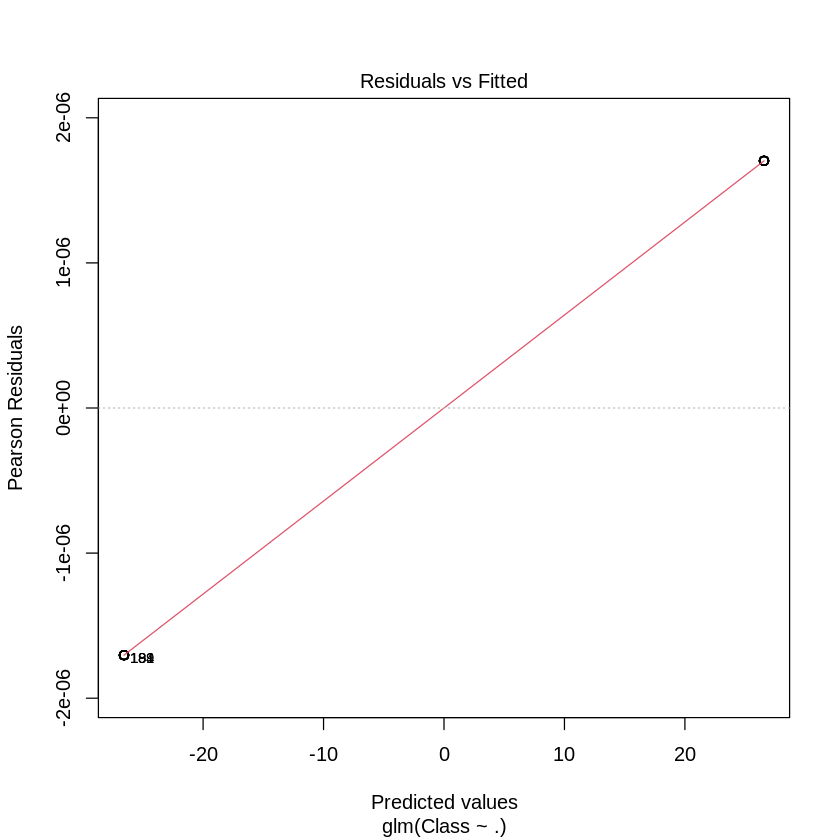

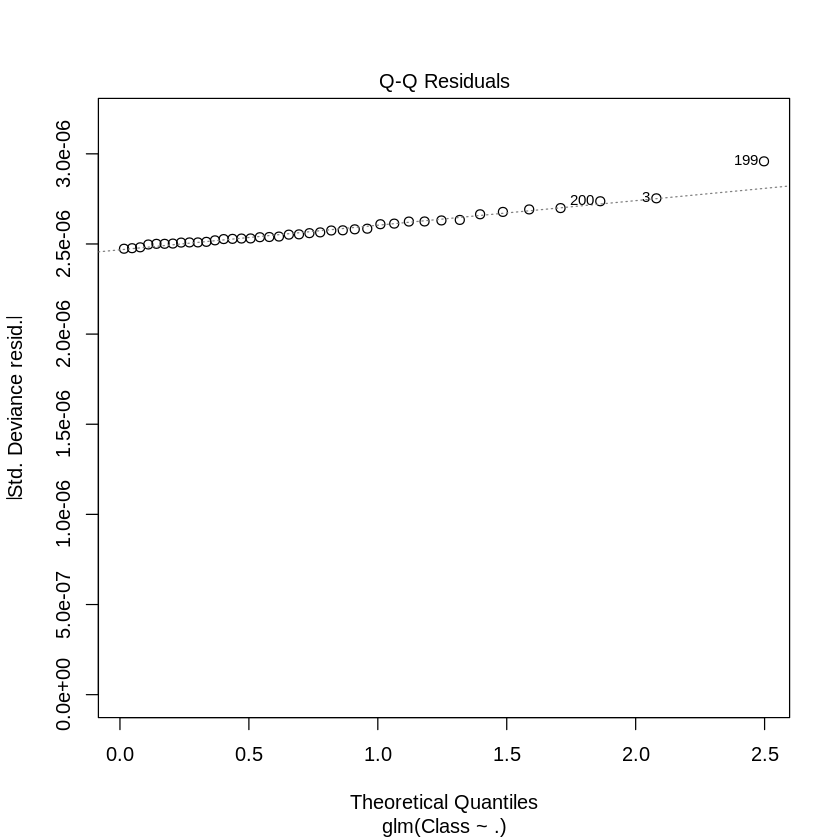

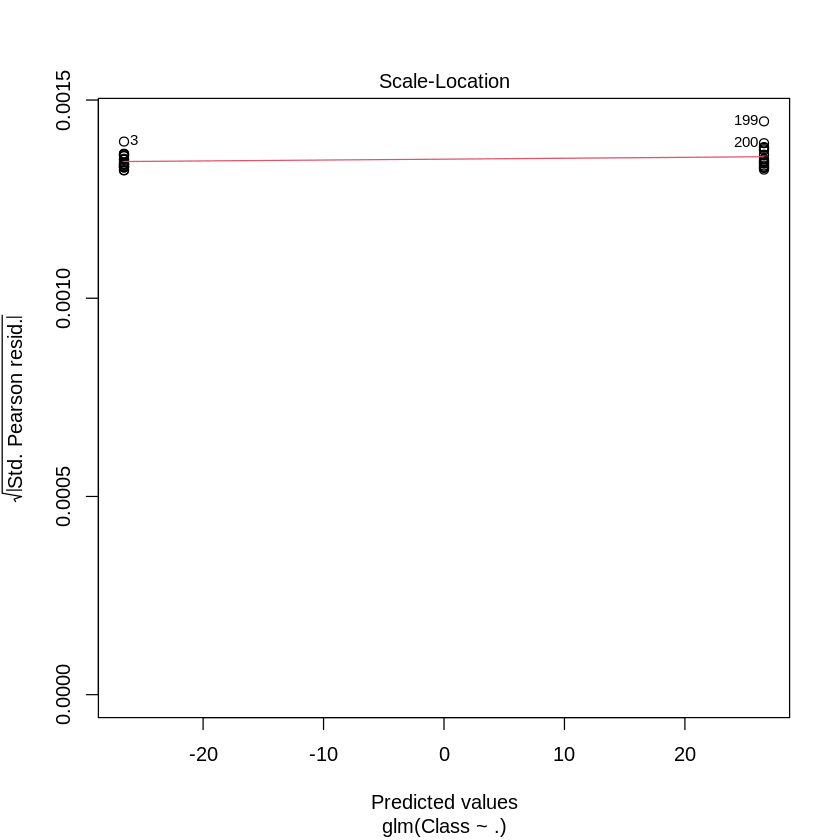

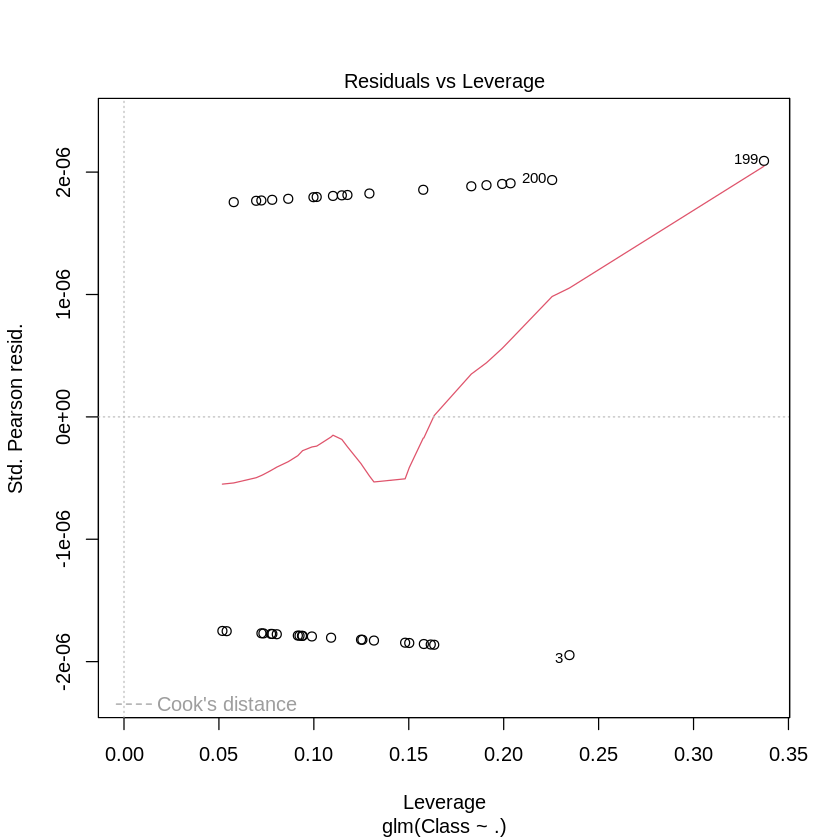

In [ ]:
plot(Logistic_Model)

Setting levels: control = Female, case = Male

Setting direction: controls < cases



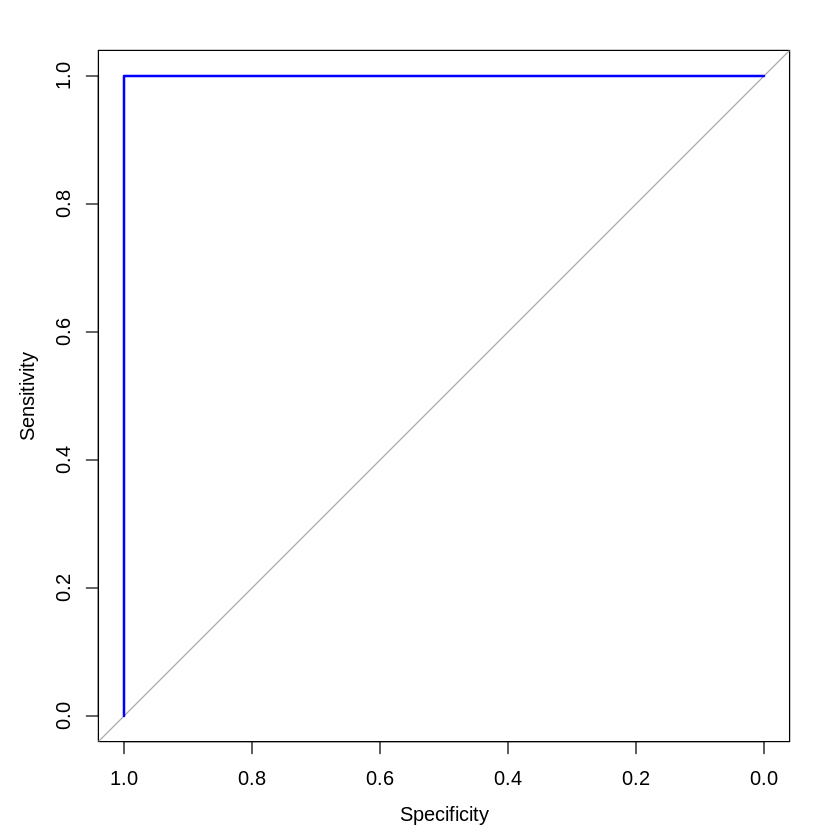

In [ ]:
library(pROC)

# Predictions on the test data (consistent with response data)
lr.predict <- predict(Logistic_Model, test_data, probability = TRUE)

# Calculate and plot ROC curve
auc.gbm <- roc(test_data$Class, lr.predict, plot = TRUE, col = "blue")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



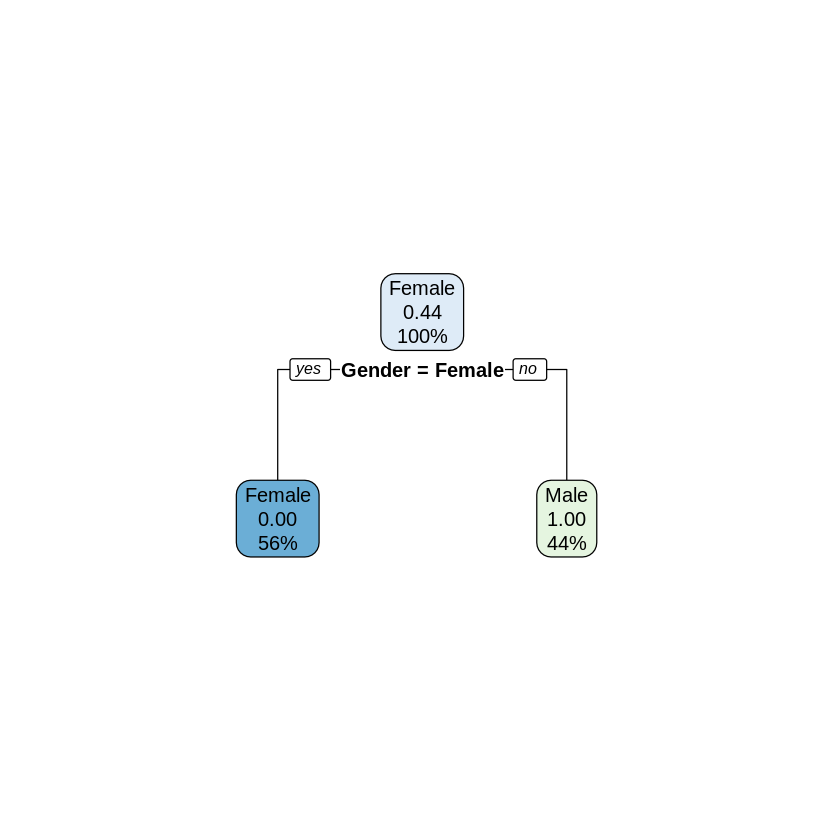

In [ ]:
# Install and load necessary packages
install.packages("rpart.plot")  # Only run this once
library(rpart)
library(rpart.plot)

# Assume you already have a dataframe called creditcard_data
# Create a 'Class' variable using 'Gender' (for classification)
creditcard_data$Class <- as.factor(creditcard_data$Gender)

# Build the decision tree model
decisionTree_model <- rpart(Class ~ . , data = creditcard_data, method = 'class')

# Predict class labels
predicted_val <- predict(decisionTree_model, creditcard_data, type = 'class')

# Predict class probabilities
probability <- predict(decisionTree_model, creditcard_data, type = 'prob')

# Plot the decision tree
rpart.plot(decisionTree_model)

In [ ]:
install.packages("neuralnet")  # Install the neuralnet package
library(neuralnet)            # Load the neuralnet package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




In [ ]:
library(neuralnet)

# Convert Class and categorical columns to numeric
train_data$Class <- ifelse(train_data$Class == "Male", 1, 0)
test_data$Class <- ifelse(test_data$Class == "Male", 1, 0)

# If Gender is also a predictor, convert it
train_data$Gender <- ifelse(train_data$Gender == "Male", 1, 0)
test_data$Gender <- ifelse(test_data$Gender == "Male", 1, 0)

# Train the neural network model
ANN_model <- neuralnet(Class ~ ., data = train_data, linear.output = FALSE)

# Plot the network
plot(ANN_model)

# Predict on test set (excluding target column)
predANN <- compute(ANN_model, test_data[, names(test_data) != "Class"])

# Get prediction results
resultANN <- predANN$net.result
resultANN <- ifelse(resultANN > 0.5, 1, 0)

# Optional: View confusion matrix
table(Predicted = resultANN, Actual = test_data$Class)

         Actual
Predicted  0
        0 40

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



   user  system elapsed 
  0.023   0.000   0.024 

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.




Confusion Matrix:
         Actual
Predicted  0  1
        0 21  0
        1  0 19


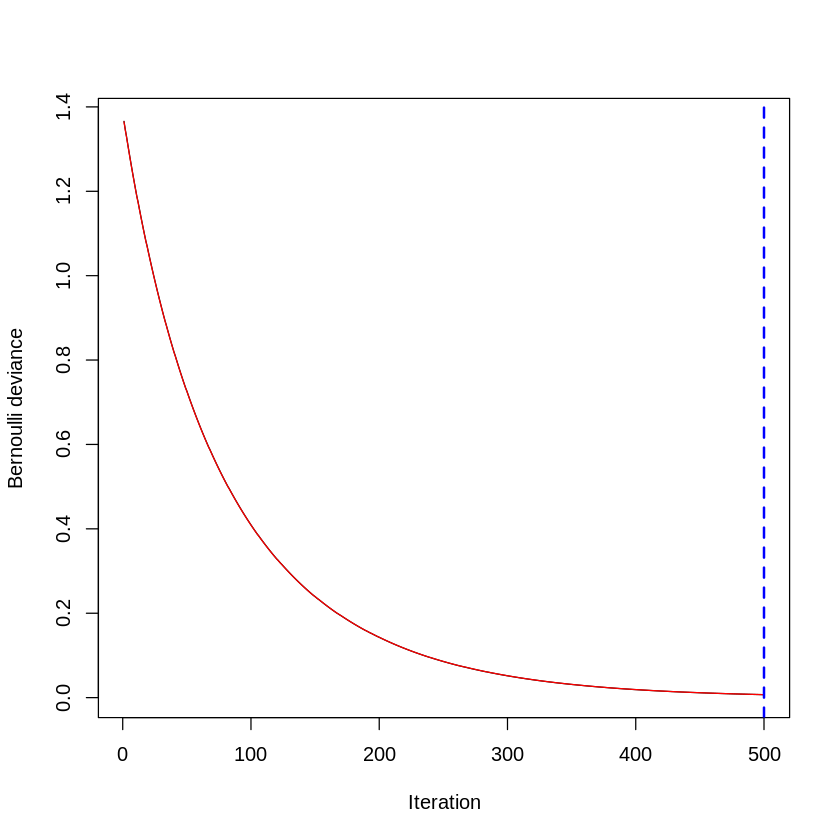

In [ ]:
# Load required packages
install.packages("gbm")
install.packages("caTools")
library(gbm)
library(caTools)

# Load your data
data <- read.csv("/content/Mall_Customers.csv")

# Create a binary classification target
data$Class <- ifelse(data$Spending.Score..1.100. > 50, 1, 0)

# Drop ID column if present
if ("CustomerID" %in% names(data)) {
  data$CustomerID <- NULL
}

# Convert categorical variables to numeric
data[] <- lapply(data, function(x) {
  if (is.factor(x) || is.character(x)) as.numeric(as.factor(x)) else x
})

# Split data
set.seed(123)
split <- sample.split(data$Class, SplitRatio = 0.8)
train_data <- subset(data, split == TRUE)
test_data <- subset(data, split == FALSE)

# Train GBM model and time it
system.time({
  model_gbm <- gbm(
    Class ~ .,
    distribution = "bernoulli",
    data = rbind(train_data, test_data),
    n.trees = 500,
    interaction.depth = 3,
    # Decreased n.minobsinnode to 50
    n.minobsinnode = 50,
    shrinkage = 0.01,
    # Increased bag.fraction to 0.7
    bag.fraction = 0.7,
    train.fraction = nrow(train_data) / (nrow(train_data) + nrow(test_data)),
    verbose = FALSE
  )
})

# Determine best iteration using Out-of-Bag (OOB) instead of 'test' to avoid plotting errors
gbm.iter <- gbm.perf(model_gbm, method = "OOB")

# Predict on test data
pred_probs <- predict(model_gbm, test_data, n.trees = gbm.iter, type = "response")
pred_class <- ifelse(pred_probs > 0.5, 1, 0)

# Confusion matrix
cat("\nConfusion Matrix:\n")
print(table(Predicted = pred_class, Actual = test_data$Class))

In [ ]:
# Convert test data variables to numeric (as above)
test_data$Class <- ifelse(test_data$Class == "Male", 1, 0)
test_data$Gender <- ifelse(test_data$Gender == "Male", 1, 0)

# Predict
pred_gbm <- predict(model_gbm, test_data, n.trees = gbm.iter, type = "response")
pred_class <- ifelse(pred_gbm > 0.5, 1, 0)

# Confusion matrix
table(Predicted = pred_class, Actual = test_data$Class)

         Actual
Predicted  0
        0 21
        1 19

In [ ]:
# Make sure 'Class' and predictors in test_data are also numeric
test_data$Class <- ifelse(test_data$Class == "Male", 1, 0)
test_data$Gender <- ifelse(test_data$Gender == "Male", 1, 0)

# Predict probabilities
pred_gbm <- predict(model_gbm, test_data, n.trees = gbm.iter, type = "response")

# Convert to class labels
pred_class <- ifelse(pred_gbm > 0.5, 1, 0)

# Confusion matrix
table(Predicted = pred_class, Actual = test_data$Class)

         Actual
Predicted  0
        0 21
        1 19

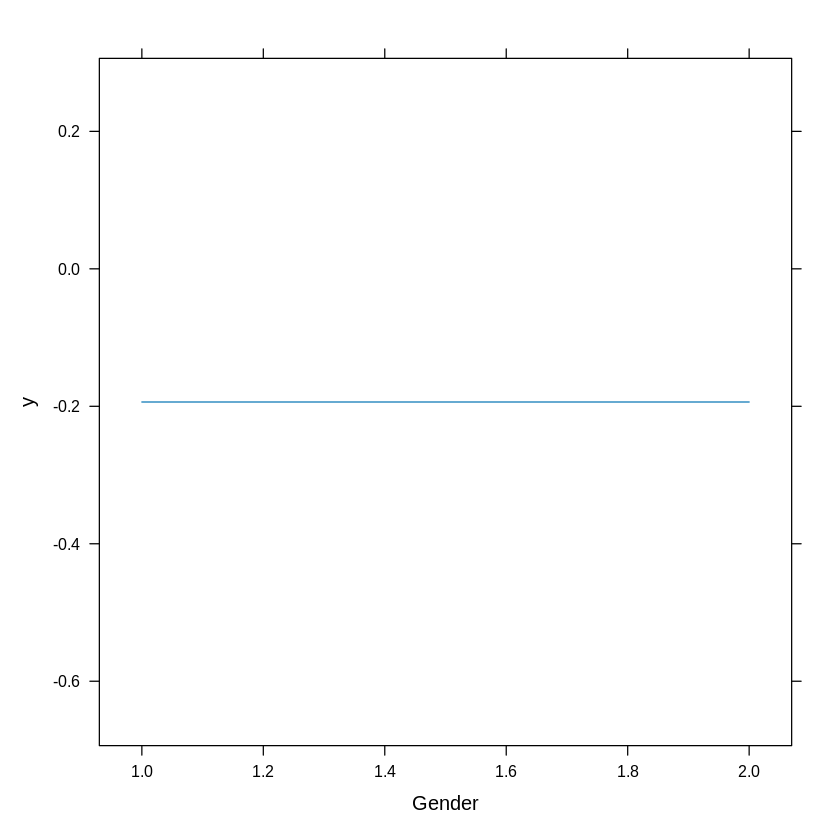

In [ ]:
model.influence = relative.influence(model_gbm, n.trees = gbm.iter, sort. = TRUE)
#Plot the gbm model

plot(model_gbm)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test_data$Class, predictor = gbm_test,     plot = TRUE, col = "red")

Data: gbm_test in 21 controls (test_data$Class 0) < 19 cases (test_data$Class 1).
Area under the curve: 1


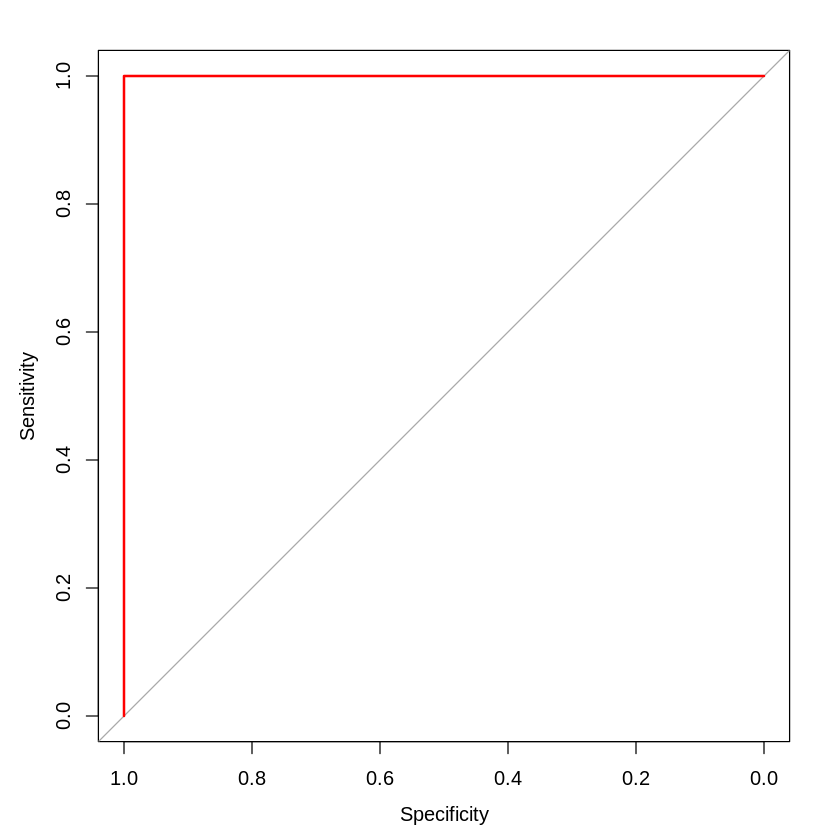

In [ ]:
# Plot and calculate AUC on test data
# Ensure 'Class' is a factor with two levels
test_data$Class <- as.factor(ifelse(test_data$Spending.Score..1.100. > 50, 1, 0))

gbm_test <- predict(model_gbm, newdata = test_data, n.trees = gbm.iter, type = "response") # Predict probabilities
gbm_auc <- roc(test_data$Class, gbm_test, plot = TRUE, col = "red")
print(gbm_auc)

In [ ]:
print(gbm_auc)


Call:
roc.default(response = test_data$Class, predictor = gbm_test,     plot = TRUE, col = "red")

Data: gbm_test in 21 controls (test_data$Class 0) < 19 cases (test_data$Class 1).
Area under the curve: 1


In [ ]:
install.packages("gbm")  # Install the gbm package
library(gbm)             # Load the gbm package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



In [ ]:
install.packages("caTools")  # Install the caTools package
library(caTools)  # Load the caTools library

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [ ]:
# Install required packages if not already installed
# install.packages("gbm")
# install.packages("caTools")
# install.packages("pROC")

library(gbm)
library(caTools)
library(pROC)

# Step 1: Load your dataset
data <- read.csv("/content/Mall_Customers.csv")

# Step 2: Create a binary 'Class' target based on Spending Score
data$Class <- ifelse(data$Spending.Score..1.100. > 50, 1, 0)

# Step 3: Remove ID column if present
if ("CustomerID" %in% names(data)) {
  data$CustomerID <- NULL
}

# Step 4: Convert character/factor columns to numeric
data[] <- lapply(data, function(x) {
  if (is.factor(x) || is.character(x)) as.numeric(as.factor(x)) else x
})

# Step 5: Split into train and test sets
set.seed(123)
split <- sample.split(data$Class, SplitRatio = 0.8)
train_data <- subset(data, split == TRUE)
test_data <- subset(data, split == FALSE)

# Step 6: Train the GBM model
model_gbm <- gbm(
  Class ~ .,
  distribution = "bernoulli",
  data = train_data,
  n.trees = 100,
  interaction.depth = 3,
  shrinkage = 0.01,
  n.minobsinnode = 10,
  bag.fraction = 0.7,
  verbose = FALSE
)

# Step 7: Predict probabilities on test data
pred_probs <- predict(model_gbm, test_data, n.trees = 100, type = "response")

# Step 8: Convert to binary class predictions
pred_class <- ifelse(pred_probs > 0.5, 1, 0)

# Step 9: Accuracy calculation
conf_mat <- table(Predicted = pred_class, Actual = test_data$Class)
accuracy <- sum(diag(conf_mat)) / sum(conf_mat)

cat("\nConfusion Matrix:\n")
print(conf_mat)
cat("\nAccuracy:", round(accuracy * 100, 2), "%\n")


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var





Confusion Matrix:
         Actual
Predicted  0  1
        0 21  0
        1  0 19

Accuracy: 100 %
